# **EDA**

In [1]:
import pandas as pd, numpy as np, os
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, roc_auc_score, precision_score, recall_score


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
computer_prices_all_price = "computer_prices_all.csv"

data = pd.read_csv(computer_prices_all_price)

This dataset contains comprehensive information about computer prices and their detailed specifications. It comprises a total of 100,000 entries (rows) and 33 columns, providing a rich source for analysis.

Here is a breakdown of the columns, including their data types as identified from the `data.info()` output:

**General Characteristics (object dtype):**

*   `device_type`: Type of device (e.g., Desktop, Laptop).
*   `brand`: Brand of the computer.
*   `model`: Specific model of the computer.
*   `os`: Operating system installed.
*   `form_factor`: Physical form factor of the device.

**Processor (CPU) Characteristics:**

*   `cpu_brand` (object): Brand of the CPU.
*   `cpu_model` (object): Model of the CPU.
*   `cpu_tier` (int64): Performance tier of the CPU.
*   `cpu_cores` (int64): Number of physical CPU cores.
*   `cpu_threads` (int64): Number of CPU threads.
*   `cpu_base_ghz` (float64): Base clock speed of the CPU in GHz.
*   `cpu_boost_ghz` (float64): Maximum boost clock speed of the CPU in GHz.

**Graphics Card (GPU) Characteristics:**

*   `gpu_brand` (object): Brand of the GPU.
*   `gpu_model` (object): Model of the GPU.
*   `gpu_tier` (int64): Performance tier of the GPU.
*   `vram_gb` (int64): Video RAM capacity in GB.

**Memory and Storage:**

*   `ram_gb` (int64): RAM capacity in GB.
*   `storage_type` (object): Type of storage (e.g., SSD, HDD).
*   `storage_gb` (int64): Total storage capacity in GB.
*   `storage_drive_count` (int64): Number of storage drives.

**Display:**

*   `display_type` (object): Type of display panel.
*   `display_size_in` (float64): Size of the display in inches.
*   `resolution` (object): Display resolution.
*   `refresh_hz` (int64): Display refresh rate in Hz.

**Power and Connectivity:**

*   `battery_wh` (int64): Battery capacity in Watt-hours (primarily for laptops).
*   `charger_watts` (int64): Charger wattage in Watts (primarily for laptops).
*   `psu_watts` (int64): Power supply unit wattage in Watts (primarily for desktops).
*   `wifi` (object): Wi-Fi standard supported.
*   `bluetooth` (float64): Bluetooth version.

**Other:**

*   `weight_kg` (float64): Weight of the device in kilograms.
*   `warranty_months` (int64): Warranty period in months.
*   `price` (float64): Price of the device.

Importantly, the dataset does not contain any missing values, as confirmed by the `data.info()` output showing 100,000 non-null entries for every column.

**Detailed Summary Statistics for Numerical Columns:**

|                  | release_year | cpu_tier | cpu_cores | cpu_threads | cpu_base_ghz | cpu_boost_ghz | gpu_tier | vram_gb | ram_gb | storage_gb | storage_drive_count | display_size_in | refresh_hz | battery_wh | charger_watts | psu_watts | bluetooth | weight_kg | warranty_months | price    |
|------------------|--------------|----------|-----------|-------------|--------------|---------------|----------|---------|--------|------------|---------------------|-----------------|------------|------------|---------------|-----------|-----------|-----------|-----------------|----------|
| count            | 100000.00    | 100000.00| 100000.00 | 100000.00   | 100000.00    | 100000.00     | 100000.00| 100000.00 | 100000.00 | 100000.00  | 100000.00           | 100000.00       | 100000.00  | 100000.00  | 100000.00     | 100000.00 | 100000.00 | 100000.00 | 100000.00       | 100000.00|
| mean             | 2022.32      | 3.15     | 10.52     | 19.37       | 2.59         | 3.53          | 2.99     | 6.15    | 39.71  | 903.94     | 1.52                | 20.13           | 98.46      | 41.81      | 61.38         | 272.52    | 5.08      | 4.29      | 22.20           | 1928.76  |
| std              | 2.03         | 1.37     | 5.04      | 9.72        | 0.34         | 0.35          | 1.46     | 3.96    | 31.90  | 774.24     | 0.80                | 6.71            | 43.30      | 35.87      | 62.80         | 354.69    | 0.25      | 3.81      | 10.23           | 580.49   |
| min              | 2018.00      | 1.00     | 4.00      | 4.00        | 2.00         | 2.80          | 1.00     | 0.00    | 8.00   | 256.00     | 1.00                | 13.30           | 60.00      | 0.00       | 0.00          | 0.00      | 4.20      | 0.92      | 12.00           | 372.99   |
| 25%              | 2021.00      | 2.00     | 6.00      | 12.00       | 2.40         | 3.30          | 2.00     | 4.00    | 16.00  | 512.00     | 1.00                | 14.00           | 60.00      | 0.00       | 0.00          | 0.00      | 5.00      | 1.50      | 12.00           | 1503.99  |
| 50%              | 2023.00      | 3.00     | 8.00      | 16.00       | 2.60         | 3.50          | 3.00     | 6.00    | 32.00  | 512.00     | 1.00                | 16.00           | 90.00      | 56.00      | 65.00         | 0.00      | 5.10      | 2.00      | 24.00           | 1863.99  |
| 75%              | 2024.00      | 4.00     | 14.00     | 24.00       | 2.80         | 3.80          | 4.00     | 8.00    | 64.00  | 1024.00    | 2.00                | 27.00           | 120.00     | 70.00      | 90.00         | 650.00    | 5.20      | 7.00      | 24.00           | 2287.99  |
| max              | 2025.00      | 6.00     | 28.00     | 56.00       | 3.40         | 4.50          | 6.00     | 16.00   | 144.00 | 4096.00    | 4.00                | 34.00           | 240.00     | 99.00      | 240.00        | 1200.00   | 5.30      | 16.00     | 48.00           | 10984.99 |

The summary statistics for numerical columns provide insights into the distribution and range of values for each feature. For instance, the `price` column has a mean of approximately $1928.76, with a standard deviation of $580.49, indicating a moderate spread in prices. The `release_year` ranges from 2018 to 2025, suggesting the dataset contains relatively recent computer models.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 33 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   device_type          100000 non-null  object 
 1   brand                100000 non-null  object 
 2   model                100000 non-null  object 
 3   release_year         100000 non-null  int64  
 4   os                   100000 non-null  object 
 5   form_factor          100000 non-null  object 
 6   cpu_brand            100000 non-null  object 
 7   cpu_model            100000 non-null  object 
 8   cpu_tier             100000 non-null  int64  
 9   cpu_cores            100000 non-null  int64  
 10  cpu_threads          100000 non-null  int64  
 11  cpu_base_ghz         100000 non-null  float64
 12  cpu_boost_ghz        100000 non-null  float64
 13  gpu_brand            100000 non-null  object 
 14  gpu_model            100000 non-null  object 
 15  gpu_tier          

In [4]:
data.any().any()

True

In [5]:
data.isna().sum()

device_type            0
brand                  0
model                  0
release_year           0
os                     0
form_factor            0
cpu_brand              0
cpu_model              0
cpu_tier               0
cpu_cores              0
cpu_threads            0
cpu_base_ghz           0
cpu_boost_ghz          0
gpu_brand              0
gpu_model              0
gpu_tier               0
vram_gb                0
ram_gb                 0
storage_type           0
storage_gb             0
storage_drive_count    0
display_type           0
display_size_in        0
resolution             0
refresh_hz             0
battery_wh             0
charger_watts          0
psu_watts              0
wifi                   0
bluetooth              0
weight_kg              0
warranty_months        0
price                  0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.describe()

,release_year,cpu_tier,cpu_cores,cpu_threads,cpu_base_ghz,cpu_boost_ghz,gpu_tier,vram_gb,ram_gb,storage_gb,storage_drive_count,display_size_in,refresh_hz,battery_wh,charger_watts,psu_watts,bluetooth,weight_kg,warranty_months,price
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000
mean,2022.320850,3.153490,10.515740,19.372700,2.591322,3.531310,2.991350,6.152180,39.706400,903.936000,1.524980,20.126655,98.464860,41.813470,61.383450,272.520500,5.084764,4.289699,22.20036,1928.764220
std,2.025761,1.373175,5.044092,9.718426,0.336435,0.350024,1.459643,3.964926,31.902684,774.243654,0.797284,6.709577,43.301652,35.868841,62.795034,354.686355,0.245977,3.814628,10.23190,580.492689
min,2018.000000,1.000000,4.000000,4.000000,2.000000,2.800000,1.000000,0.000000,8.000000,256.000000,1.000000,13.300000,60.000000,0.000000,0.000000,0.000000,4.200000,0.920000,12.00000,372.990000
25%,2021.000000,2.000000,6.000000,12.000000,2.400000,3.300000,2.000000,4.000000,16.000000,512.000000,1.000000,14.000000,60.000000,0.000000,0.000000,0.000000,5.000000,1.500000,12.00000,1503.990000
50%,2023.000000,3.000000,8.000000,16.000000,2.600000,3.500000,3.000000,6.000000,32.000000,512.000000,1.000000,16.000000,90.000000,56.000000,65.000000,0.000000,5.100000,2.000000,24.00000,1863.990000
75%,2024.000000,4.000000,14.000000,24.000000,2.800000,3.800000,4.000000,8.000000,64.000000,1024.000000,2.000000,27.000000,120.000000,70.000000,90.000000,650.000000,5.200000,7.000000,24.00000,2287.990000
max,2025.000000,6.000000,28.000000,56.000000,3.400000,4.500000,6.000000,16.000000,144.000000,4096.000000,4.000000,34.000000,240.000000,99.000000,240.000000,1200.000000,5.300000,16.000000,48.00000,10984.990000


In [8]:
data.head(+6)

,device_type,brand,model,release_year,os,form_factor,cpu_brand,cpu_model,cpu_tier,cpu_cores,...,resolution,refresh_hz,battery_wh,charger_watts,psu_watts,wifi,bluetooth,weight_kg,warranty_months,price
0,Desktop,Samsung,Samsung Forge XDI,2022,Windows,ATX,Intel,Intel i5-11129,3,12,...,2560x1440,90,0,0,750,Wi-Fi 6,5.1,11.00,36,1383.99
1,Laptop,Samsung,Samsung Pro KM8,2022,Windows,Mainstream,Intel,Intel i7-11114,4,12,...,1920x1080,90,56,120,0,Wi-Fi 6,5.3,2.03,12,2274.99
2,Desktop,Lenovo,Lenovo Strix BIE,2024,macOS,SFF,AMD,AMD Ryzen 5 5168,2,8,...,3440x1440,120,0,0,850,Wi-Fi 6,5.0,7.00,24,1879.99
3,Desktop,Dell,Dell Cube AXR,2024,Windows,ATX,AMD,AMD Ryzen 5 7550,2,6,...,3440x1440,120,0,0,650,Wi-Fi 6,5.2,6.00,36,1331.99
4,Laptop,Gigabyte,Gigabyte Pro IX1,2024,Linux,Gaming,AMD,AMD Ryzen 7 6230,5,16,...,2560x1600,90,80,90,0,Wi-Fi 6,5.2,1.50,12,2681.99
5,Desktop,MSI,MSI Think KSG,2025,Windows,ATX,Intel,Intel i7-10369,5,16,...,2560x1440,90,0,0,1000,Wi-Fi 5,5.0,9.00,36,2751.99


In [9]:
categorical = data.select_dtypes(include=['object']).columns
print(f'\nCategorical data: {list(categorical)}')

for column in categorical:
  print(f"\n{column}: {data[column].nunique()} unique values")
  print(f"Top-values: {data[column].value_counts().head().to_dict()}")


Categorical data: ['device_type', 'brand', 'model', 'os', 'form_factor', 'cpu_brand', 'cpu_model', 'gpu_brand', 'gpu_model', 'storage_type', 'display_type', 'resolution', 'wifi']

device_type: 2 unique values
Top-values: {'Laptop': 59844, 'Desktop': 40156}

brand: 10 unique values
Top-values: {'Lenovo': 15992, 'HP': 14114, 'Dell': 14005, 'Apple': 11915, 'ASUS': 10159}

model: 99036 unique values
Top-values: {'Lenovo Think 0V5': 3, 'HP Creator R41': 3, 'ASUS Slim R6S': 3, 'Acer Creator 3U0': 3, 'Dell Think QJA': 3}

os: 4 unique values
Top-values: {'Windows': 71817, 'macOS': 18207, 'Linux': 6109, 'ChromeOS': 3867}

form_factor: 10 unique values
Top-values: {'Mainstream': 17819, 'Gaming': 16876, 'ATX': 15597, 'Ultrabook': 13236, 'Micro-ATX': 8672}

cpu_brand: 3 unique values
Top-values: {'Intel': 52774, 'AMD': 35311, 'Apple': 11915}

cpu_model: 26971 unique values
Top-values: {'Apple M2 Pro': 1389, 'Apple M1': 1374, 'Apple M2 Max': 1367, 'Apple M1 Pro': 1341, 'Apple M3 Pro': 1315}

gpu_

In [10]:
correlation_year_price = data['release_year'].corr(data['price'])

print(f"Correlation between Release Year and Price: {correlation_year_price:.4f}")

Correlation between Release Year and Price: 0.0897


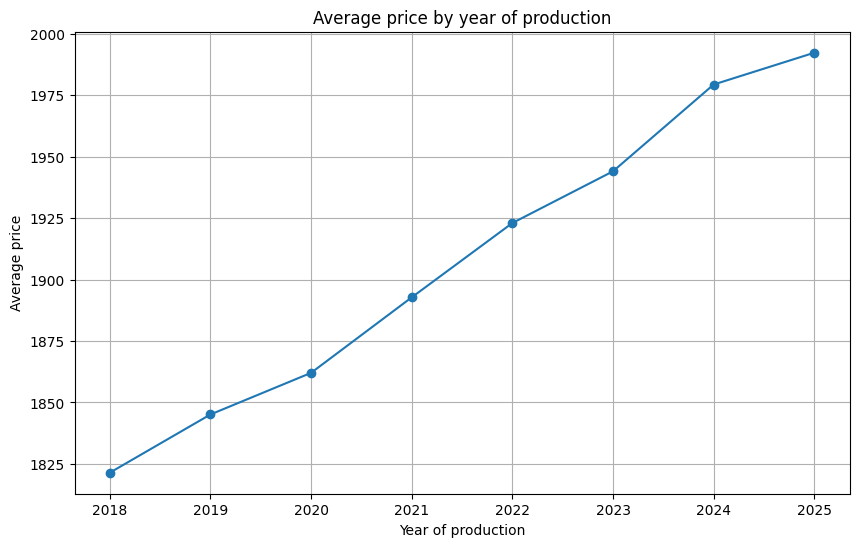

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

year_price = data.groupby('release_year')['price'].mean()

plt.figure(figsize=(10, 6))
plt.plot(year_price.index, year_price.values, marker='o')
plt.title('Average price by year of production')
plt.xlabel('Year of production')
plt.ylabel('Average price')
plt.grid(True)
plt.show()

## Encoding of categorical variables


High_impact: ['brand', 'cpu_brand', 'os', 'gpu_brand', 'resolution', 'display_type', 'form_factor'] + ['device_type']

In [12]:
results = []

for feature in categorical:

    category_means = data.groupby(feature)['price'].mean()
    price_range = category_means.max() - category_means.min()
    results.append((feature, price_range, data[feature].nunique()))

results.sort(key=lambda x: x[1], reverse=True)

for feature, price_range, num_values in results:

  print(f" {feature:15} | Range of price: {price_range:4.0f} | Values: {num_values}")

 model           | Range of price: 10612 | Values: 99036
 cpu_model       | Range of price: 7936 | Values: 26971
 gpu_model       | Range of price: 1520 | Values: 49
 brand           | Range of price:  602 | Values: 10
 cpu_brand       | Range of price:  496 | Values: 3
 os              | Range of price:  354 | Values: 4
 gpu_brand       | Range of price:  335 | Values: 4
 resolution      | Range of price:  325 | Values: 6
 display_type    | Range of price:  294 | Values: 6
 form_factor     | Range of price:  287 | Values: 10
 device_type     | Range of price:  183 | Values: 2
 storage_type    | Range of price:   99 | Values: 4
 wifi            | Range of price:    6 | Values: 4


In [13]:
features_onehot = ['os', 'cpu_brand', 'gpu_brand', 'device_type']
data_encoded = pd.get_dummies(data, columns=features_onehot, prefix=features_onehot)

print("One-Hot encoded features:")
onehot_cols = [col for col in data_encoded.columns if any(f in col for f in features_onehot)]
print(f"Created {len(onehot_cols)} features")

One-Hot encoded features:
Created 14 features


In [14]:
brand_means = data.groupby('brand')['price'].mean()
form_factor_means = data.groupby('form_factor')['price'].mean()

data_encoded['brand_encoded'] = data['brand'].map(brand_means)
data_encoded['form_factor_encoded'] = data['form_factor'].map(form_factor_means)

print("Target encoded features:")
print(f"brand_encoded: {data_encoded['brand_encoded'].mean():.0f} (average)")
print(f"form_factor_encoded: {data_encoded['form_factor_encoded'].mean():.0f} (average)")

Target encoded features:
brand_encoded: 1929 (average)
form_factor_encoded: 1929 (average)


In [15]:
resolution_order = {'1920x1080': 1, '2560x1440': 2, '2560x1600': 3,
                   '2880x1800': 4, '3440x1440': 5, '3840x2160': 6}
display_order = {'LED': 1, 'IPS': 2, 'QLED': 3, 'Mini-LED': 4, 'OLED': 5, 'VA': 6}

data_encoded['resolution_encoded'] = data['resolution'].map(resolution_order)
data_encoded['display_type_encoded'] = data['display_type'].map(display_order)

print("Ordinal encoded features:")
print(f"resolution: {sorted(resolution_order.items(), key=lambda x: x[1])}")
print(f"display_type: {sorted(display_order.items(), key=lambda x: x[1])}")

Ordinal encoded features:
resolution: [('1920x1080', 1), ('2560x1440', 2), ('2560x1600', 3), ('2880x1800', 4), ('3440x1440', 5), ('3840x2160', 6)]
display_type: [('LED', 1), ('IPS', 2), ('QLED', 3), ('Mini-LED', 4), ('OLED', 5), ('VA', 6)]


In [16]:
encoded_columns = [column for column in data_encoded.columns if 'encoded' in column or any(f in column for f in features_onehot)]

print(f"Categorical (encoded): {len(encoded_columns)}")

Categorical (encoded): 18


## Visualization

d:\Projects\ml_at_hse\seminar1\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


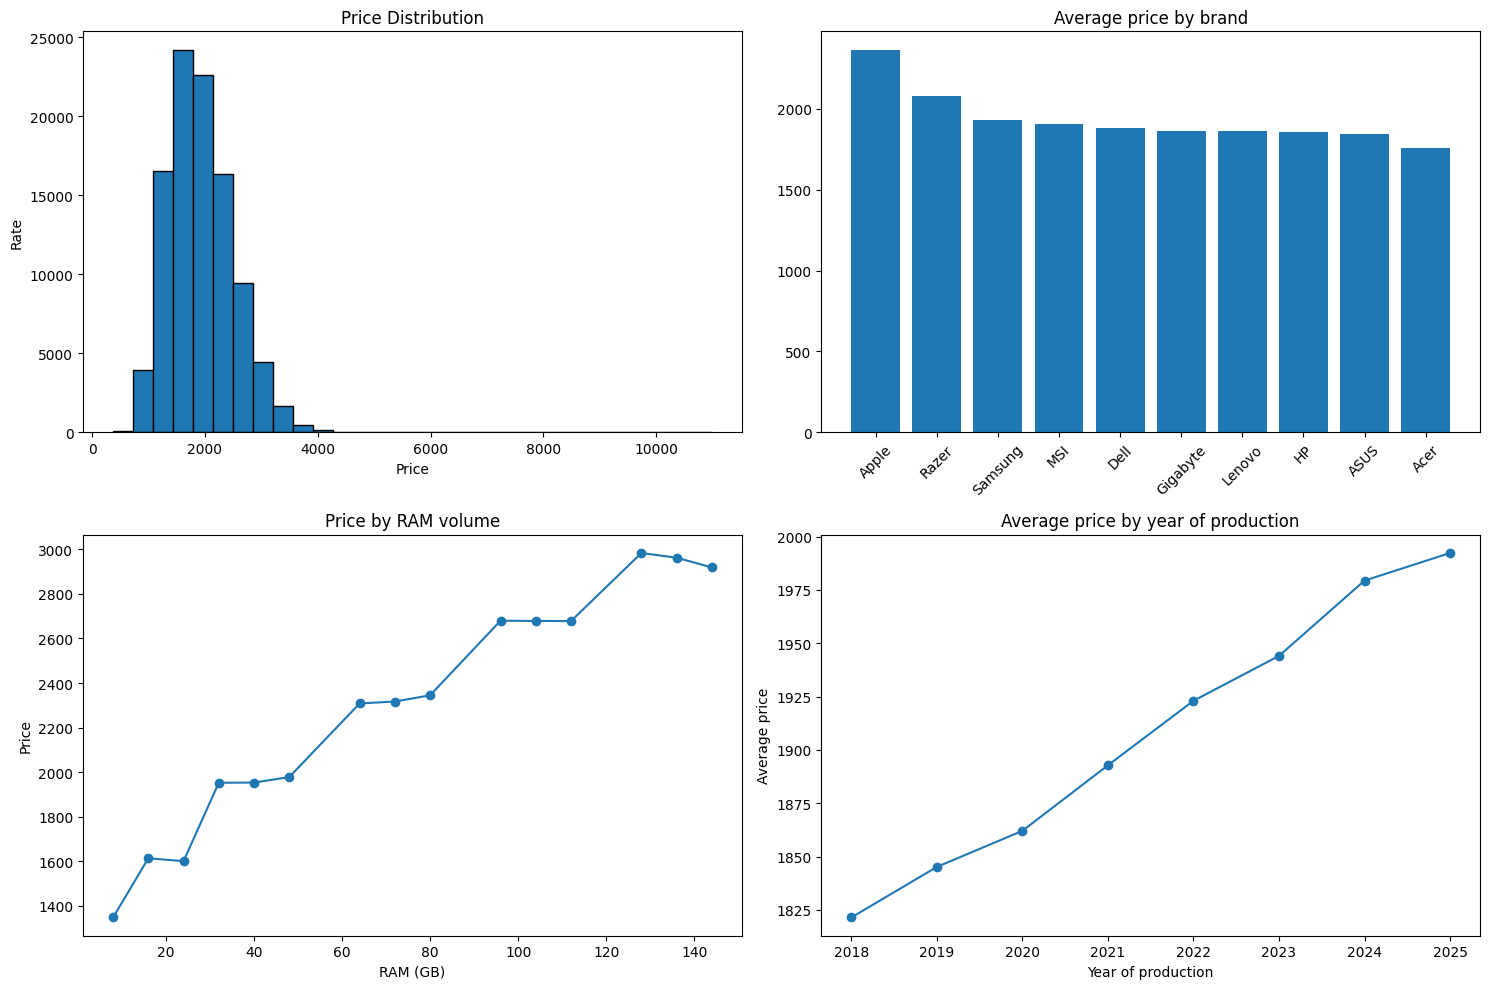

In [17]:
from kagglehub.handle import dataclass
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].hist(data['price'], bins=30, edgecolor='black')
axes[0, 0].set_title('Price Distribution')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Rate')

brand_price = data.groupby('brand')['price'].mean().sort_values(ascending=False)
axes[0, 1].bar(brand_price.index, brand_price.values)
axes[0, 1].set_title('Average price by brand')
axes[0, 1].tick_params(axis='x', rotation=45)

year_RAM = data.groupby('ram_gb')['price'].mean()
axes[1, 0].plot(year_RAM.index, year_RAM.values, marker='o')
axes[1, 0].set_title('Price by RAM volume')
axes[1, 0].set_xlabel('RAM (GB)')
axes[1, 0].set_ylabel('Price')

year_price = data.groupby('release_year')['price'].mean()
axes[1, 1].plot(year_price.index, year_price.values, marker='o')
axes[1, 1].set_title('Average price by year of production')
axes[1, 1].set_xlabel('Year of production')
axes[1, 1].set_ylabel('Average price')

plt.tight_layout()
plt.savefig('data_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

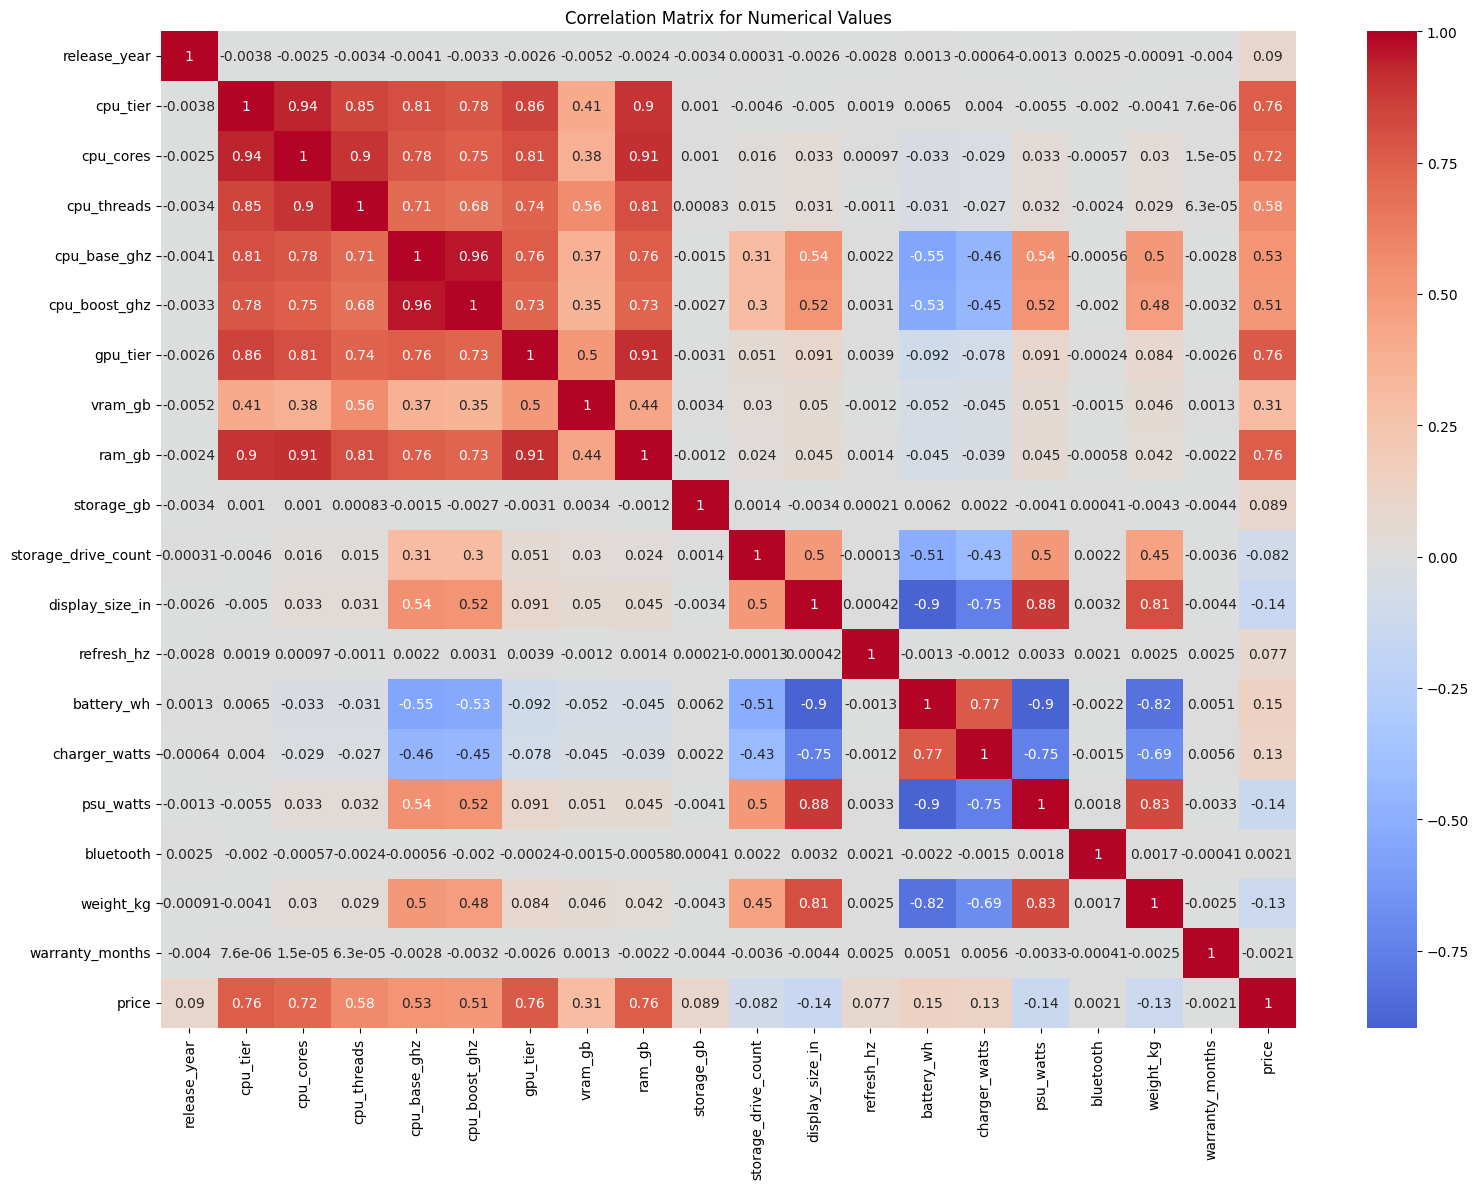

In [18]:
numerical_cols = data.select_dtypes(include=[np.number]).columns


plt.figure(figsize=(16, 12))

correlation_matrix = data[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title('Correlation Matrix for Numerical Values')
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')

plt.show()

In [19]:
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

print("Correlation with price:")
print(price_correlations)

Correlation with price:
price                  1.000000
gpu_tier               0.762875
cpu_tier               0.759196
ram_gb                 0.758654
cpu_cores              0.720464
cpu_threads            0.577503
cpu_base_ghz           0.529910
cpu_boost_ghz          0.508507
vram_gb                0.305017
battery_wh             0.147212
charger_watts          0.126309
release_year           0.089721
storage_gb             0.088937
refresh_hz             0.077244
bluetooth              0.002076
warranty_months       -0.002138
storage_drive_count   -0.082437
weight_kg             -0.130727
psu_watts             -0.140530
display_size_in       -0.143405
Name: price, dtype: float64


In [20]:
correlations_more_30 = price_correlations[abs(price_correlations) >= 0.30]
correlations_more_30 = correlations_more_30.drop('price')

print(correlations_more_30)

gpu_tier         0.762875
cpu_tier         0.759196
ram_gb           0.758654
cpu_cores        0.720464
cpu_threads      0.577503
cpu_base_ghz     0.529910
cpu_boost_ghz    0.508507
vram_gb          0.305017
Name: price, dtype: float64


In [21]:
numerical_features = ['gpu_tier', 'cpu_tier', 'ram_gb', 'cpu_cores', 'cpu_threads', 'cpu_base_ghz', 'cpu_boost_ghz', 'vram_gb']

print(f"Numerical features (encoded): {len(numerical_features)}")

Numerical features (encoded): 8


# **Model training**

In [22]:
X = data_encoded[encoded_columns + numerical_features]
y = data["price"]

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")


X shape: (100000, 26)
y shape: (100000,)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

In [25]:
results = {}

for name, model in models.items():
  print(f"\n{name}:")

  if name == 'Linear Regression':
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

  else:

    X_train_np = X_train.values
    X_test_np = X_test.values

    model.fit(X_train_np, y_train)
    y_pred = model.predict(X_test_np)


  mae = mean_absolute_error(y_test, y_pred)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  r2 = r2_score(y_test, y_pred)

  results[name] = {'mae': mae, 'rmse': rmse, 'r2': r2}

  print(f"  R²: {r2:.4f}")
  print(f"  MAE: {mae:.2f}")
  print(f"  RMSE: {rmse:.2f}")



Linear Regression:
  R²: 0.8306
  MAE: 173.54
  RMSE: 236.53

Random Forest:
  R²: 0.8088
  MAE: 178.62
  RMSE: 251.25

XGBoost:
  R²: 0.8451
  MAE: 162.19
  RMSE: 226.18


In [26]:
print(f"Linear Regression:  R² = {results['Linear Regression']['r2']:.4f}, MAE = {results['Linear Regression']['mae']:.2f}")
print(f"Random Forest:      R² = {results['Random Forest']['r2']:.4f}, MAE = {results['Random Forest']['mae']:.2f}")
print(f"XGBoost:            R² = {results['XGBoost']['r2']:.4f}, MAE = {results['XGBoost']['mae']:.2f}")

best_model_name = max(results, key=lambda x: results[x]['r2'])
best_r2 = results[best_model_name]['r2']

print(f"\nThe best model: {best_model_name} (R² = {best_r2:.4f})")

Linear Regression:  R² = 0.8306, MAE = 173.54
Random Forest:      R² = 0.8088, MAE = 178.62
XGBoost:            R² = 0.8451, MAE = 162.19

The best model: XGBoost (R² = 0.8451)


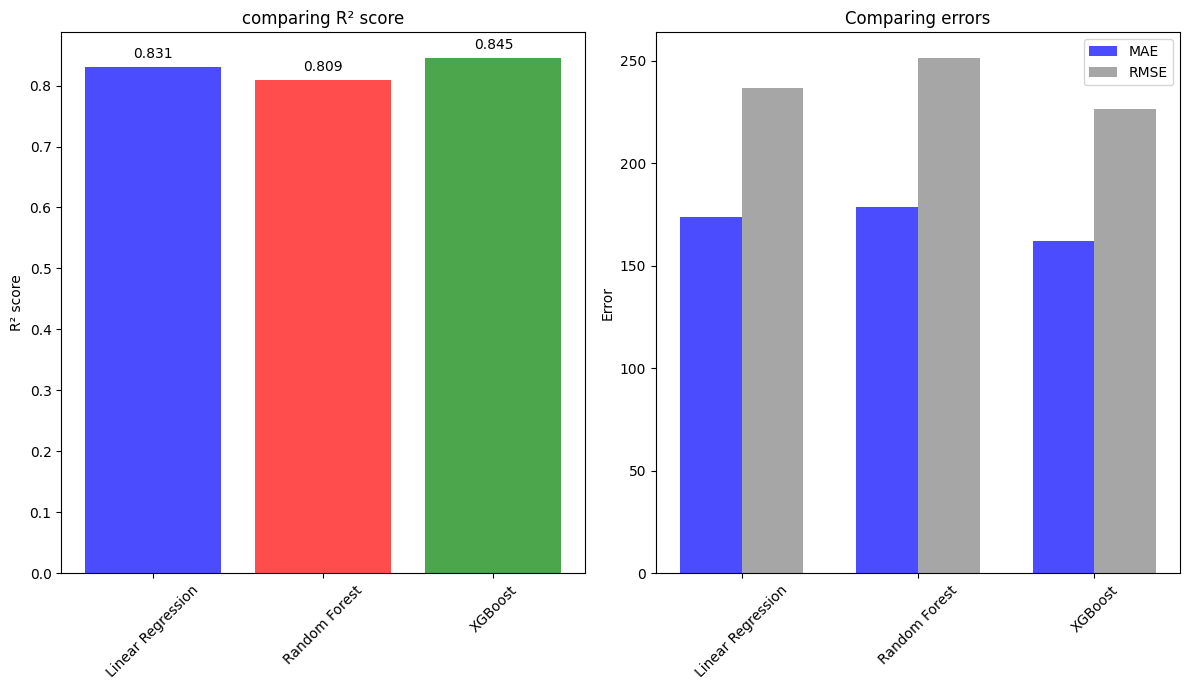

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
models = list(results.keys())
r2_scores = [results[model]['r2'] for model in models]
colors = ['blue', 'red', 'green']

bars = plt.bar(models, r2_scores, color=colors, alpha=0.7)
plt.title('comparing R² score')
plt.ylabel('R² score')
plt.xticks(rotation=45)

for bar, score in zip(bars, r2_scores):
  plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, f'{score:.3f}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
mae_scores = [results[model]['mae'] for model in models]
rmse_scores = [results[model]['rmse'] for model in models]

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, mae_scores, width, label='MAE', color='blue', alpha=0.7)
plt.bar(x + width/2, rmse_scores, width, label='RMSE', color='grey', alpha=0.7)
plt.title('Comparing errors')
plt.ylabel('Error')
plt.xticks(x, models, rotation=45)
plt.legend()

plt.tight_layout()
plt.show()
